<a href="https://colab.research.google.com/github/BhavyaSreeSreeramuluKishoreKumarReddy/Project/blob/main/IntelligentDataIntegrationAndSchemaMatchingUsingAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Necessary Libraries
!pip install -q annoy scikit-learn pandas matplotlib seaborn optuna xgboost catboost joblib gradio nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.9 MB/s eta 0:00:00


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import gradio as gr
import nltk

In [4]:
# Download NLTK Resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [5]:
# Dataset Paths
data_paths = {
    'ratings': '/content/drive/MyDrive/Dissertation/ratings.csv',
    'tags': '/content/drive/MyDrive/Dissertation/tags.csv',
    'movies': '/content/drive/MyDrive/Dissertation/movies.csv',
    'genome_scores': '/content/drive/MyDrive/Dissertation/genome-scores.csv',
    'genome_tags': '/content/drive/MyDrive/Dissertation/genome-tags.csv',
    'links': '/content/drive/MyDrive/Dissertation/links.csv'
}

In [6]:
# Load Data
def load_data(paths):
    data = {key: pd.read_csv(path) for key, path in paths.items()}
    return data

data = load_data(data_paths)

In [7]:
# Rule-Based Schema Matching
def rule_based_schema_matching(column_name):
    if 'rating' in column_name.lower():
        return 'User Feedback Metric'
    elif 'tag' in column_name.lower():
        return 'Content Descriptor'
    elif 'year' in column_name.lower() or 'time' in column_name.lower():
        return 'Temporal Metadata'
    elif 'movie' in column_name.lower():
        return 'Movie Information'
    elif 'user' in column_name.lower():
        return 'User Metadata'
    else:
        return 'Unmatched Schema'

def apply_schema_matching(dataframe):
    return {col: rule_based_schema_matching(col) for col in dataframe.columns}

In [8]:
# Evaluate Schema Matching Accuracy
def evaluate_schema_matching(dataframes, ground_truth):
    total_columns = 0
    correct_matches = 0
    for key, df in dataframes.items():
        predicted_schema = apply_schema_matching(df)
        actual_schema = ground_truth.get(key, {})
        for col, predicted in predicted_schema.items():
            if col in actual_schema and predicted == actual_schema[col]:
                correct_matches += 1
            total_columns += 1
    accuracy = correct_matches / total_columns if total_columns > 0 else 0
    return accuracy

In [9]:
# Ground Truth for Schema Matching
ground_truth = {
    'ratings': {
        'userId': 'User Metadata',
        'movieId': 'Movie Information',
        'rating': 'User Feedback Metric',
        'timestamp': 'Temporal Metadata'
    },
    'tags': {
        'userId': 'User Metadata',
        'movieId': 'Movie Information',
        'tag': 'Content Descriptor',
        'timestamp': 'Temporal Metadata'
    },
    'movies': {
        'movieId': 'Movie Information',
        'title': 'Movie Information',
        'genres': 'Content Descriptor'
    }
}

In [10]:
# Compute and Print Schema Matching Accuracy
schema_matching_accuracy = evaluate_schema_matching(data, ground_truth)
print(f"Schema Matching Accuracy: {schema_matching_accuracy:.2f}")

Schema Matching Accuracy: 0.47


--- RATINGS ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33832162 entries, 0 to 33832161
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 1.0 GB
None 

             userId       movieId        rating     timestamp
count  3.383216e+07  3.383216e+07  3.383216e+07  3.383216e+07
mean   1.654380e+05  2.831348e+04  3.542540e+00  1.269362e+09
std    9.534122e+04  4.992865e+04  1.063959e+00  2.541023e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    8.295300e+04  1.219000e+03  3.000000e+00  1.046718e+09
50%    1.661290e+05  3.263000e+03  4.000000e+00  1.264740e+09
75%    2.474500e+05  4.049100e+04  4.000000e+00  1.496919e+09
max    3.309750e+05  2.889830e+05  5.000000e+00  1.689843e+09 

Missing Values:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64 

--- TAGS ---
<cla

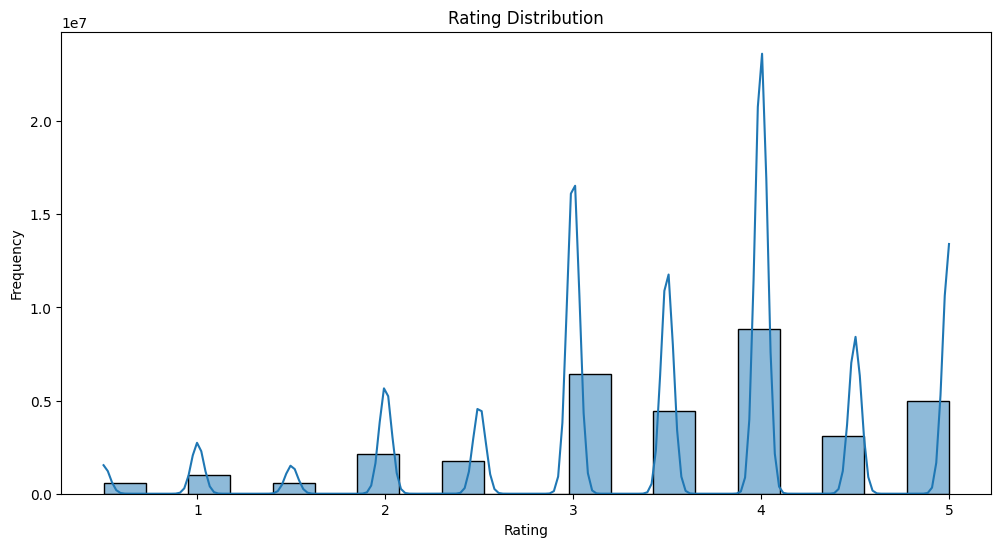

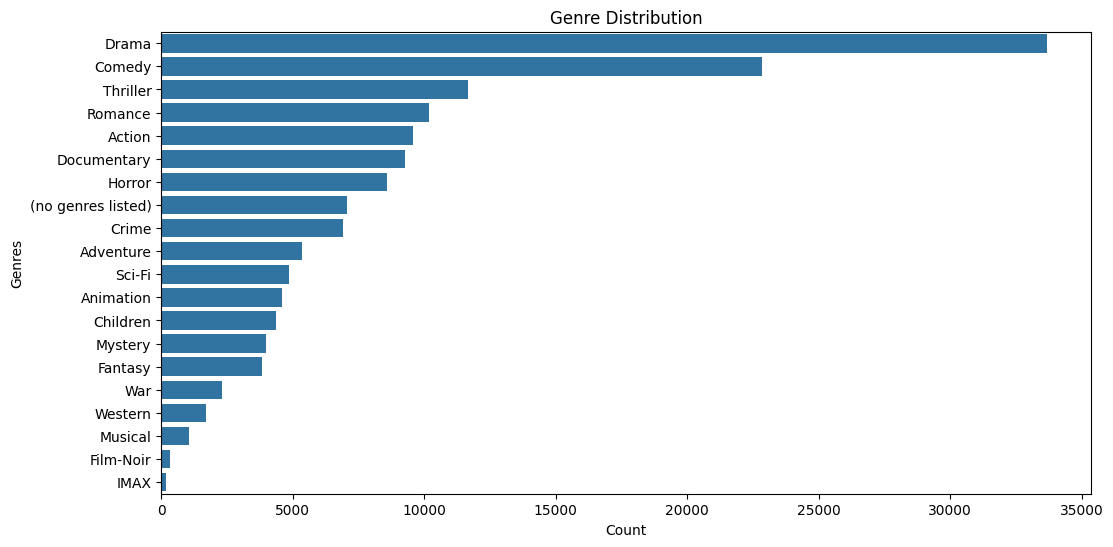

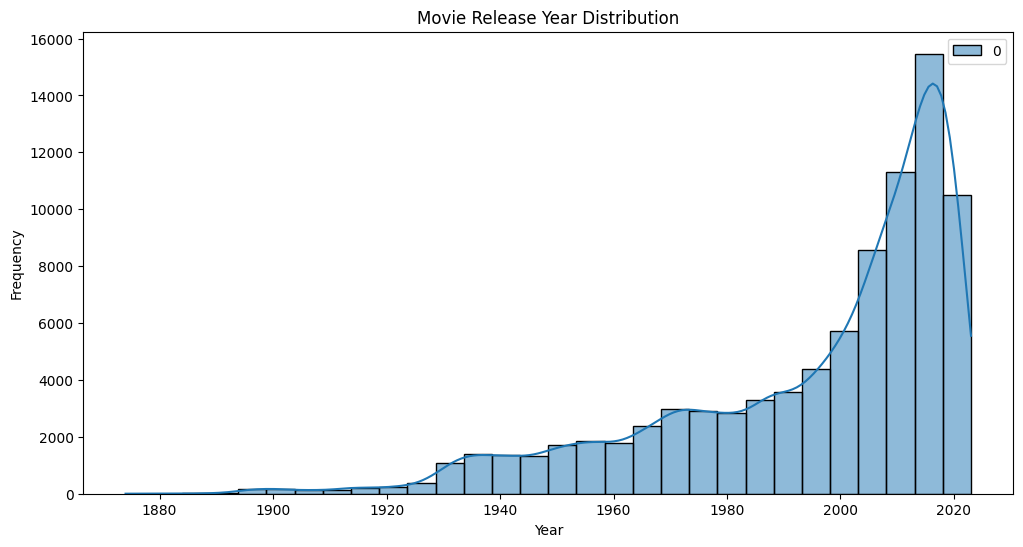

In [11]:
# Data Description
def describe_data(data):
    for key, df in data.items():
        print(f"--- {key.upper()} ---")
        print(df.info(), "\n")
        print(df.describe(include='all'), "\n")
        print("Missing Values:\n", df.isna().sum(), "\n")

describe_data(data)

# Plot Data Distributions
def plot_data_distributions(data):
    plt.figure(figsize=(12, 6))
    sns.histplot(data['ratings']['rating'], bins=20, kde=True)
    plt.title("Rating Distribution")
    plt.xlabel("Rating")
    plt.ylabel("Frequency")
    plt.show()

    genres = data['movies']['genres'].str.split('|').explode().value_counts()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=genres.values, y=genres.index)
    plt.title("Genre Distribution")
    plt.xlabel("Count")
    plt.ylabel("Genres")
    plt.show()

    years = data['movies']['title'].str.extract(r'\((\d{4})\)').astype(float)
    plt.figure(figsize=(12, 6))
    sns.histplot(years, bins=30, kde=True)
    plt.title("Movie Release Year Distribution")
    plt.xlabel("Year")
    plt.ylabel("Frequency")
    plt.show()

plot_data_distributions(data)

In [12]:
# Preprocessing
def preprocess_data(ratings, movies, tags):
    merged_data = pd.merge(ratings, movies, on='movieId', how='inner')
    merged_data = pd.merge(merged_data, tags, on=['movieId', 'userId'], how='left')

    # Keep "Comedy" and "Drama" Genres data, drop others
    def drop_data(merged_data):
        merged_data = merged_data[merged_data['genres'].isin(['Comedy', 'Drama'])]
        return merged_data

    # remove unnecessary data
    merged_data = drop_data(merged_data)

    # Handle Missing Tags
    merged_data['tag'].fillna('', inplace=True)
    merged_data['tag'] = merged_data['tag'].astype(str)

    # # TF-IDF Processing
    # stop_words = set(nltk.corpus.stopwords.words('english'))
    # merged_data['processed_tags'] = merged_data['tag'].apply(
    #     lambda x: ' '.join([word.lower() for word in nltk.word_tokenize(str(x)) if word.lower() not in stop_words])
    # )
    # tfidf = TfidfVectorizer(max_features=30)
    # tags_tfidf = tfidf.fit_transform(merged_data['processed_tags']).toarray()

    # # Add tags_tfidf as a new column of merged_data
    # merged_data['tag_tfidf'] = list(tags_tfidf)

    return merged_data #tags_tfidf

In [13]:
# Feature Engineering
def feature_engineering(merged_data):
    merged_data['year'] = merged_data['title'].str.extract(r'\((\d{4})\)').astype(float)
    # merged_data['year'].fillna(merged_data['year'].mean(), inplace=True)
    merged_data['year'].dropna()
    merged_data['rating'] = StandardScaler().fit_transform(merged_data[['rating']])

    return merged_data

In [14]:
# merged_data, tags_tfidf = preprocess_data(data['ratings'], data['movies'], data['tags'])
merged_data = preprocess_data(data['ratings'], data['movies'], data['tags'])

<ipython-input-12-5762f740b438>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['tag'].fillna('', inplace=True)


In [15]:
merged_data = feature_engineering(merged_data)

In [16]:
# Get unique values in merged_data['tag']
merged_data['tag'].nunique()

29283

In [17]:
# Annoy Index for Recommendations
def build_annoy_index(movie_ratings):
    annoy_index = AnnoyIndex(2, 'angular')  # Use 2 features: rating and tag
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(movie_ratings[['rating', 'tag']])
    for i, row in enumerate(scaled_features):
        annoy_index.add_item(i, row)
    annoy_index.build(15)  # Use 15 trees
    return annoy_index

In [18]:
# Prepare Data for Training
def prepare_data(merged_data):
    movie_ratings = merged_data.groupby('movieId').agg({'rating': 'mean', 'tag': 'nunique'}).reset_index()

    # annoy_index = build_annoy_index(movie_ratings)
    # print(annoy_index)

    movie_ratings[['rating', 'tag']] = StandardScaler().fit_transform(movie_ratings[['rating', 'tag']])

    # # Add annoy_index as a new column of movie_ratings
    # movie_ratings['annoy_index'] = movie_ratings['movieId'].apply(lambda x: annoy_index.get_item_vector(x))

    X = movie_ratings[['rating', 'tag']]
    y = merged_data.groupby('movieId')['genres'].first().values
    y_encoded = LabelEncoder().fit_transform(y)
    return X, y_encoded

In [19]:
X, y_encoded = prepare_data(merged_data)

In [20]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [21]:
# Fix for Consistent Labels in Models
def align_labels(y_train, y_test):
    # Ensure all potential labels are represented
    all_classes = np.unique(np.concatenate([y_train, y_test]))

    # Align y_train and y_test to ensure consistent class labels
    y_train_aligned = np.array([np.where(all_classes == label)[0][0] for label in y_train])
    y_test_aligned = np.array([np.where(all_classes == label)[0][0] for label in y_test])

    return y_train_aligned, y_test_aligned, all_classes

y_train, y_test, all_classes = align_labels(y_train, y_test)

In [22]:
# Train Models
def train_models(X_train, y_train, X_test, y_test):
    models = {
        'Logistic Regression': LogisticRegression(max_iter=200),
        'Decision Tree': DecisionTreeClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'XGBoost': XGBClassifier(),
        'CatBoost': CatBoostClassifier(verbose=0),
        'MLP': MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
    }
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
        print(f"{name} Accuracy: {accuracy:.2f}")
        print(classification_report(y_test, y_pred))
    return results

results = train_models(X_train, y_train, X_test, y_test)

Logistic Regression Accuracy: 0.61
              precision    recall  f1-score   support

           0       0.48      0.12      0.19      1476
           1       0.63      0.92      0.74      2363

    accuracy                           0.61      3839
   macro avg       0.55      0.52      0.47      3839
weighted avg       0.57      0.61      0.53      3839

Decision Tree Accuracy: 0.59
              precision    recall  f1-score   support

           0       0.44      0.25      0.32      1476
           1       0.63      0.80      0.71      2363

    accuracy                           0.59      3839
   macro avg       0.54      0.53      0.51      3839
weighted avg       0.56      0.59      0.56      3839

Gradient Boosting Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.55      0.23      0.33      1476
           1       0.65      0.88      0.75      2363

    accuracy                           0.63      3839
   macro avg       0.60      0.

In [23]:
# Select Best Model
best_model_name = max(results, key=results.get)
print(f"The best model is {best_model_name} with an accuracy of {results[best_model_name]:.2f}")

The best model is CatBoost with an accuracy of 0.63


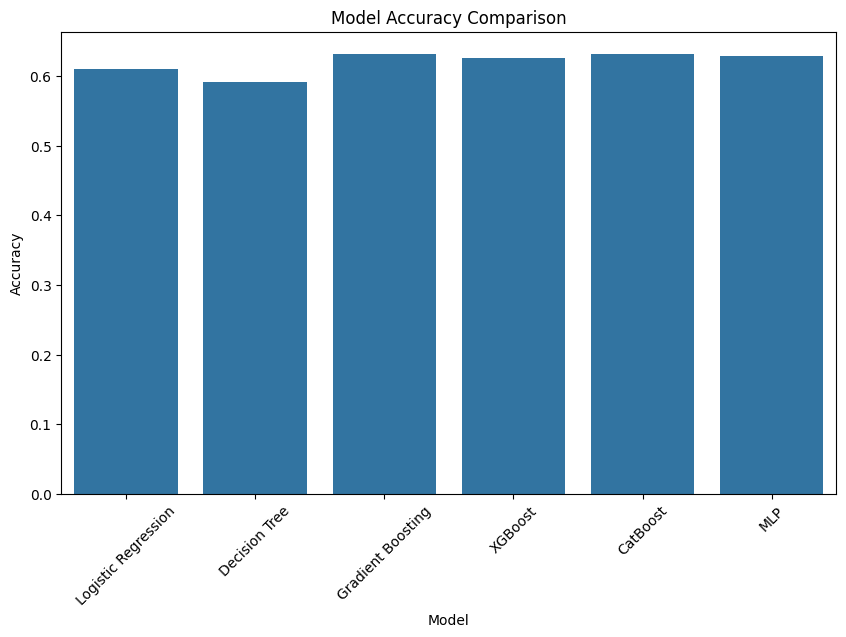

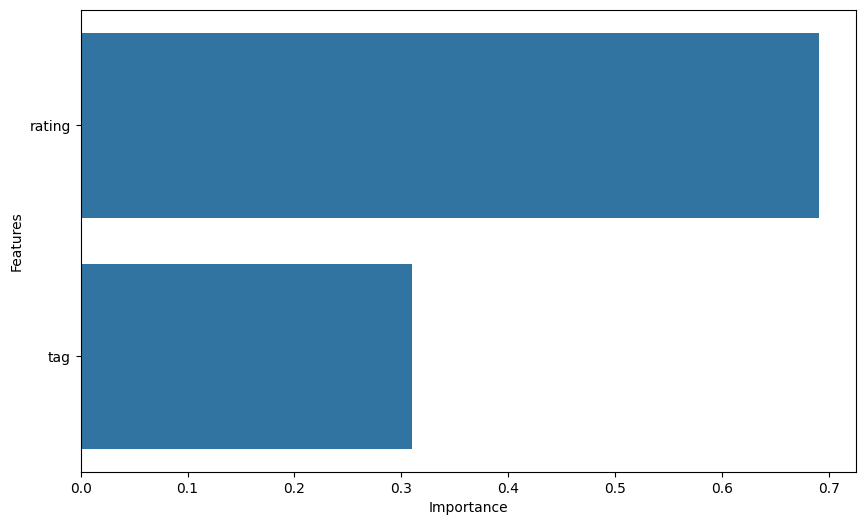

In [30]:
# Model Performance Comparison
def plot_model_performance(results):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(results.keys()), y=list(results.values()))
    plt.title("Model Accuracy Comparison")
    plt.ylabel("Accuracy")
    plt.xlabel("Model")
    plt.xticks(rotation=45)
    plt.show()

plot_model_performance(results)


# Feature Importance Plot
def plot_feature_importance(model, feature_names):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        plt.figure(figsize=(10, 6))
        sns.barplot(x=importances, y=feature_names)
        #plt.title(f"Feature Importance ({model._class.name_})")
        plt.xlabel("Importance")
        plt.ylabel("Features")
        plt.show()
    else:
        print(f"{model._class.name_} does not support feature importances.")

# Example: Feature importance for XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
plot_feature_importance(xgb_model, X_train.columns)

In [25]:
# Gradio UI for Recommendations
def recommend_similar_movies_ui(movie_id):
    similar_ids = annoy_index.get_nns_by_item(movie_id, 5)
    movie_titles = data['movies'][data['movies']['movieId'].isin(similar_ids)]['title'].values
    original_title = data['movies'].loc[data['movies']['movieId'] == movie_id, 'title'].values[0]
    return f"Movies similar to {original_title}:\n" + "\n".join(movie_titles)

def predict_genre_ui(rating, year):
    scaled_features = StandardScaler().fit_transform([[rating, year]])
    genre_prediction = best_model.predict(scaled_features)
    predicted_genre = LabelEncoder().inverse_transform([genre_prediction])[0]
    return f"The predicted genre is: {predicted_genre}"

In [26]:
# Create UI
recommend_interface = gr.Interface(fn=recommend_similar_movies_ui, inputs=gr.Number(label="Movie ID"), outputs=gr.Textbox(label="Recommended Movies"))
genre_interface = gr.Interface(fn=predict_genre_ui, inputs=[gr.Slider(0, 5, step=0.1, label="Rating"), gr.Number(label="Year")], outputs=gr.Textbox(label="Predicted Genre"))

gr.TabbedInterface([recommend_interface, genre_interface], ["Recommendations", "Genre Prediction"]).launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f97ff993ab95605395.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
